In [ ]:
О наборе данных
Описание данных
Существует 3 типа входных характеристик:

Цель: фактическая информация;
Обследование: результаты медицинского обследования;
Субъективно: информация, предоставленная пациентом.

Характеристики:

Возраст | Объективный признак | age | int (дни)
Рост | Объективный признак | рост | int (см) |
Вес | Объективный признак | масса | int (кг) |
Пол | Объективный признак | гендер | категориальный код |(1 - женщины, 2-мужчины)
Систолическое артериальное давление | Функция обследования | ap_hi | int |
Диастолическое артериальное давление | Функция обследования | ap_lo | int |
Холестерин | Особенности исследования | холестерин | 1: в норме, 2: выше нормы, 3: значительно выше нормы
Глюкоза | Особенность исследования | глюк | 1: в норме, 2: выше нормы, 3: значительно выше нормы
Курение | Субъективная характеристика | дым | бинарный код |
Потребление алкоголя | Субъективная характеристика | алкоголь | бинарный |
Физическая активность | Субъективная характеристика | активная | бинарная |
Наличие или отсутствие сердечно-сосудистых заболеваний | Целевая переменная | кардио | бинарный |
Все значения набора данных были собраны на момент медицинского обследования.


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [9]:
cardio_train = pd.read_csv('cardio_train.csv', delimiter=';')
cardio_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [12]:
# Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

dupl_columns = list(cardio_train.columns)
dupl_columns.remove

mask = cardio_train.duplicated(subset=dupl_columns)
cardio_train_duplicates = cardio_train[mask]
print(f'Число найденных дубликатов: {cardio_train_duplicates.shape[0]}')

Число найденных дубликатов: 0


In [15]:
# удалим все строки с пропущенными значениями:
cardio_train = cardio_train.dropna()
cardio_train.drop('id', axis=1, inplace=True)
cardio_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [16]:
cardio_train.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


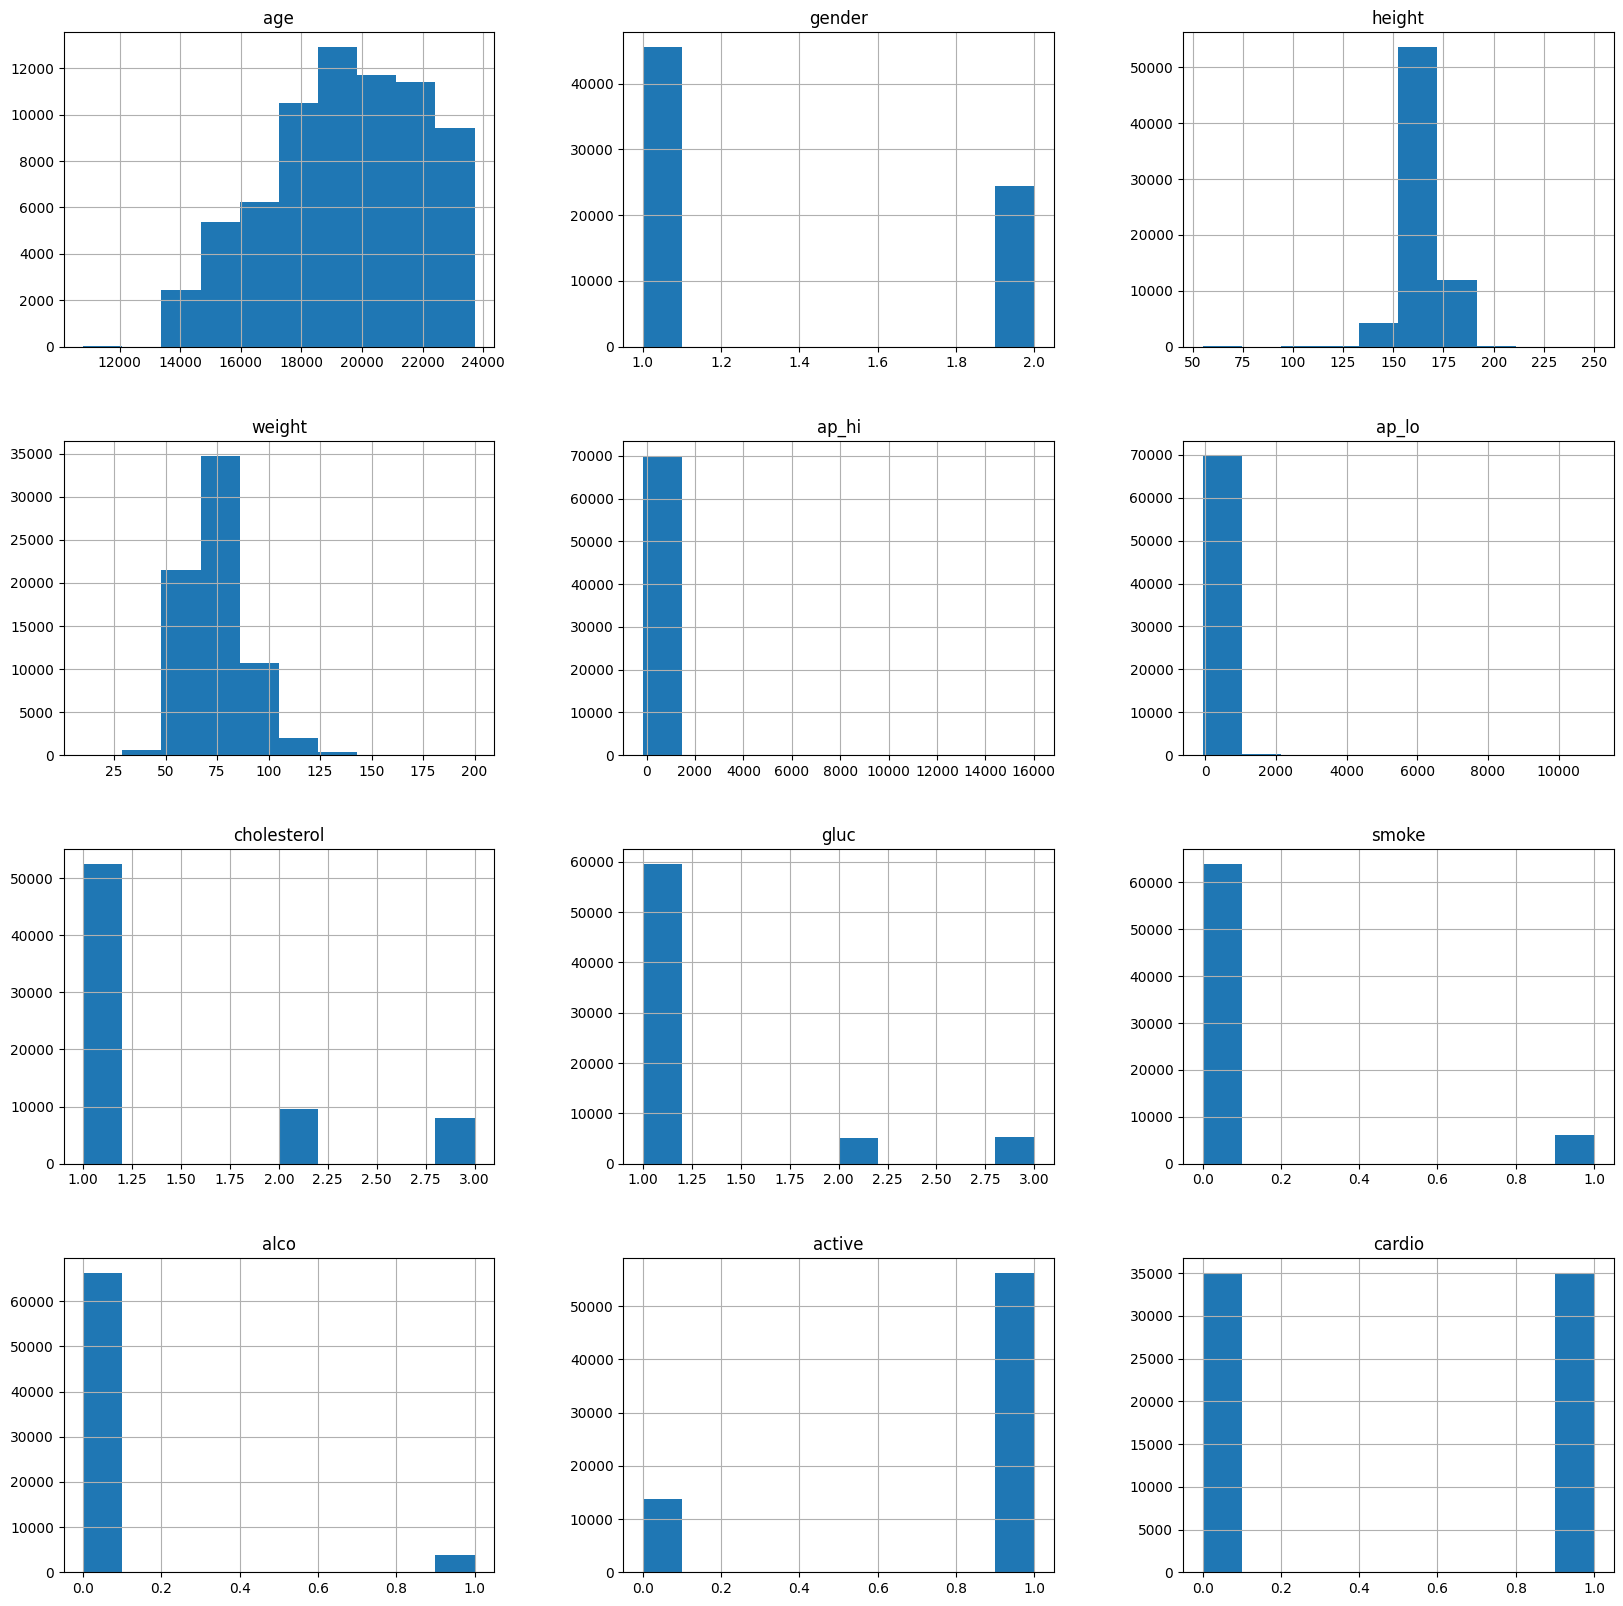

In [17]:
# построим гистограммы для всех столбцов с числовыми данными:

cardio_train.hist(figsize=(20,20))
plt.show()

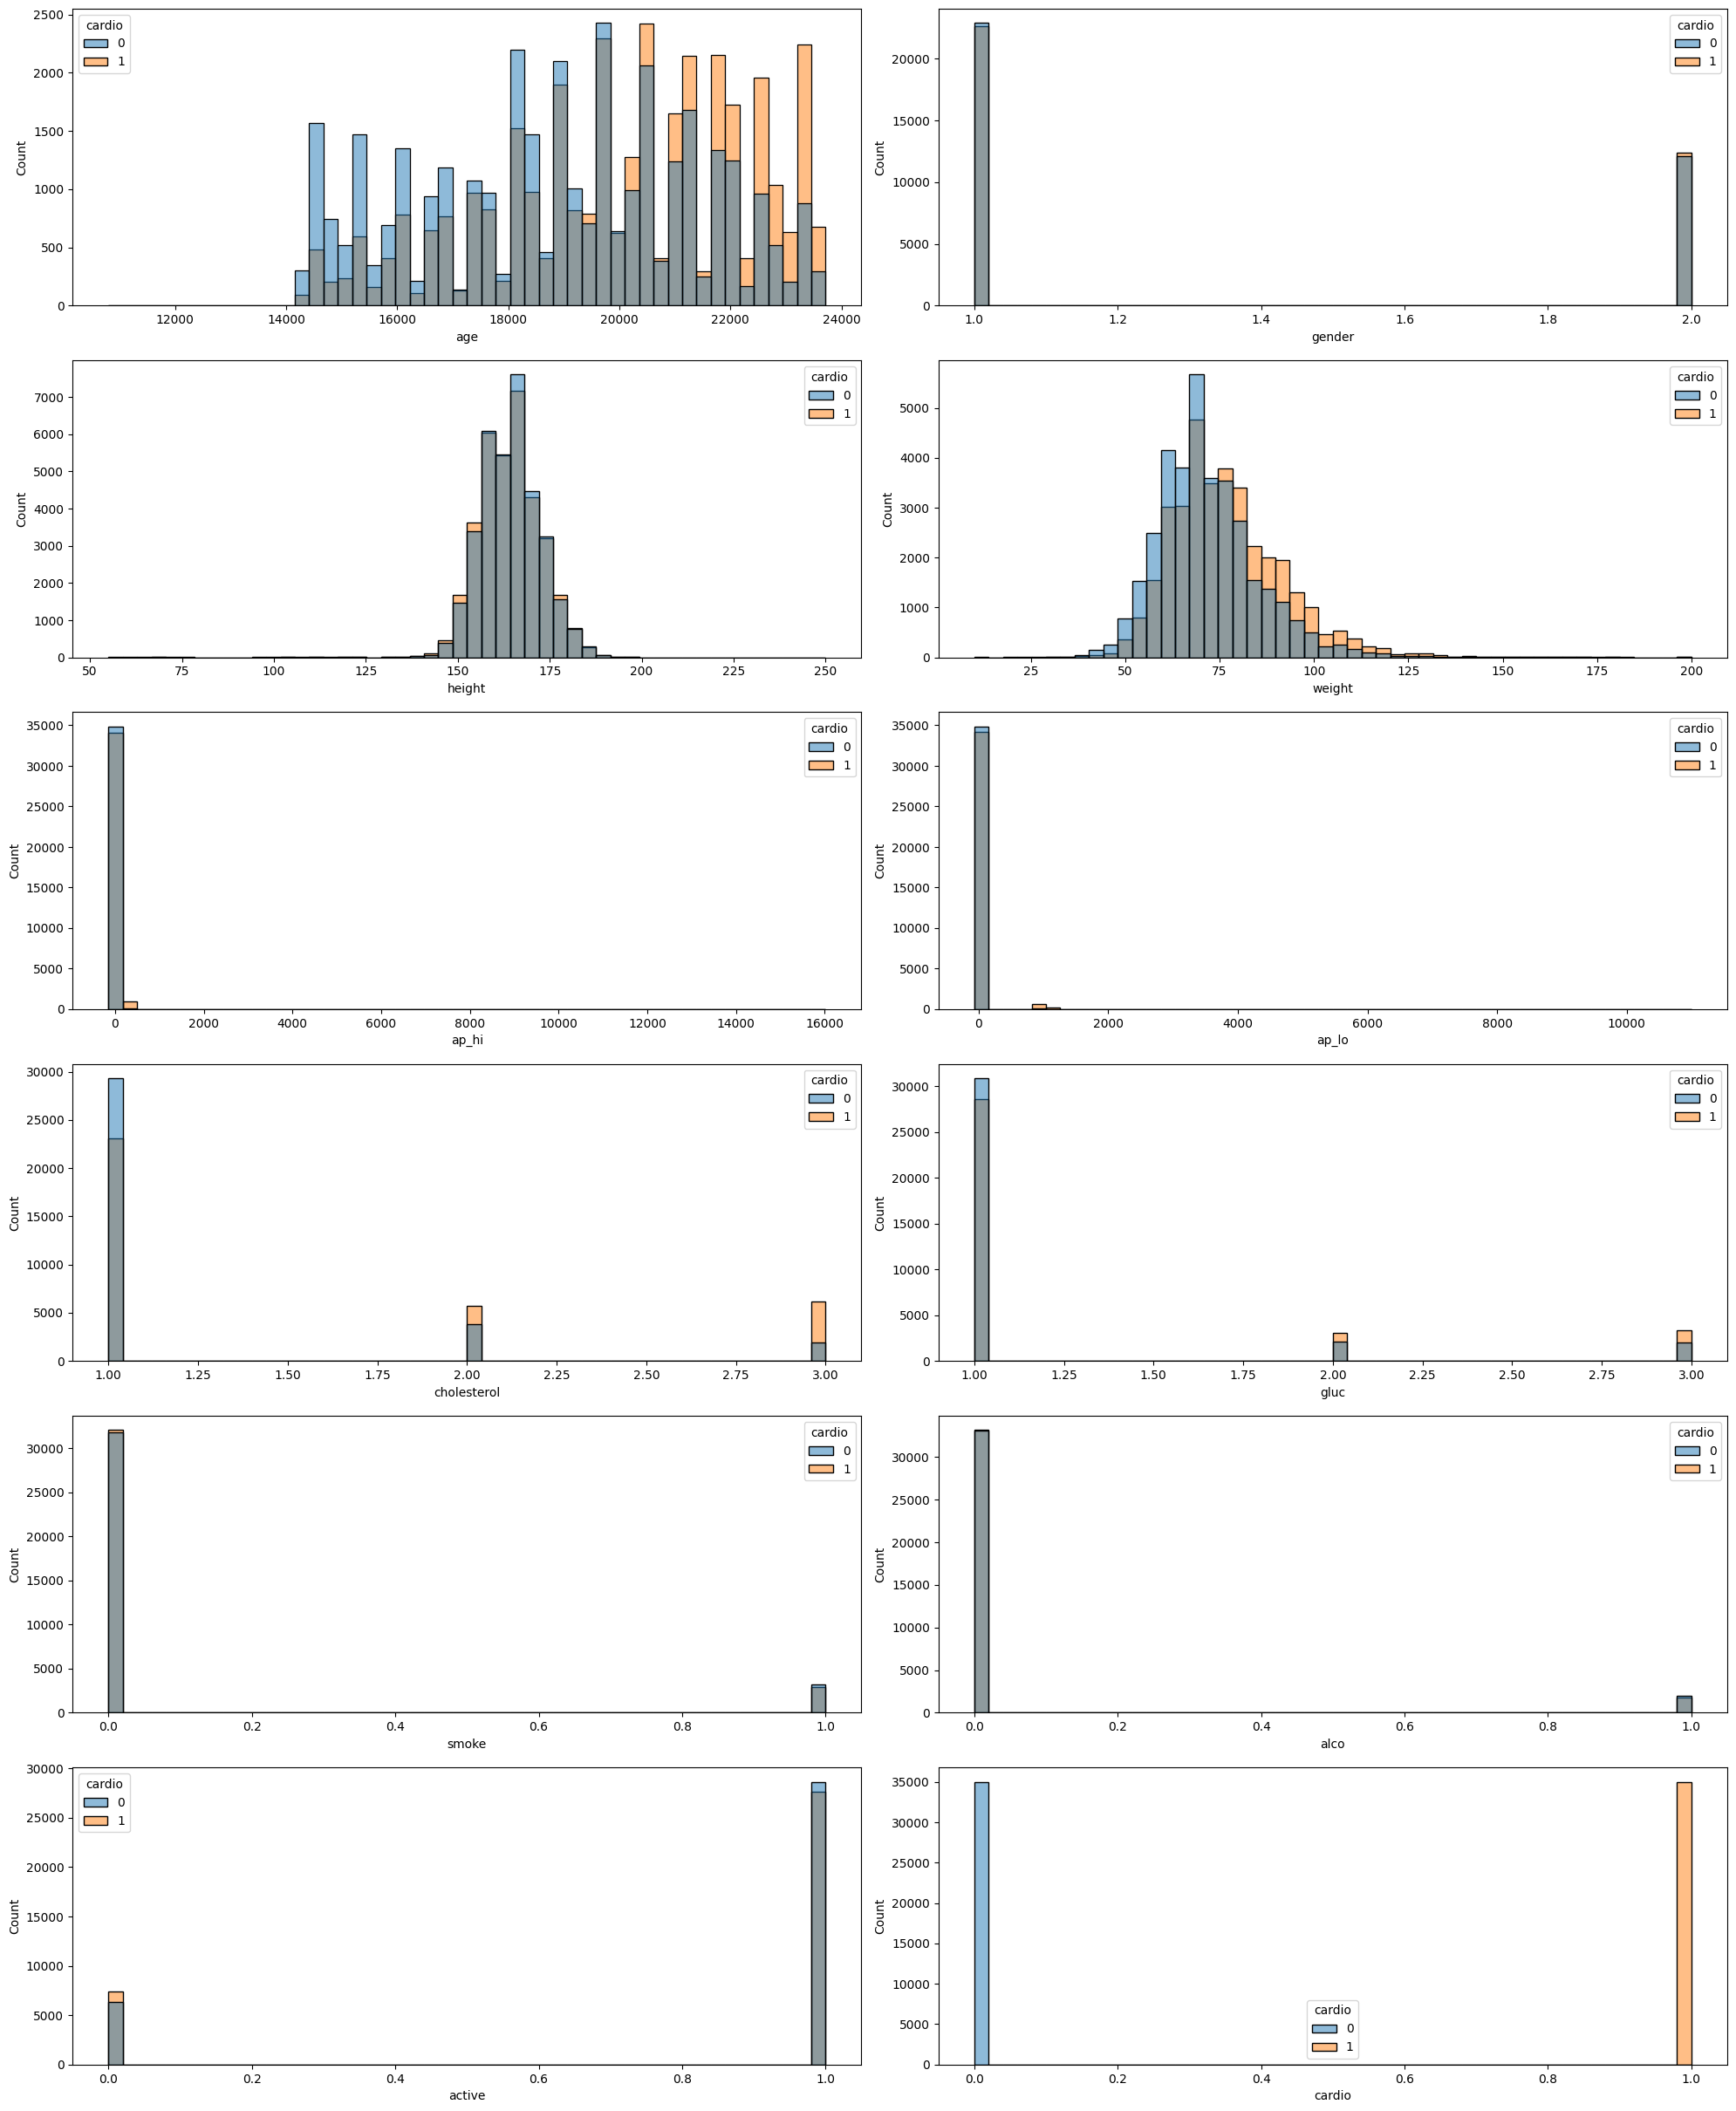

In [20]:
plt.figure(figsize=(20, 40), dpi=100)

for i, column in enumerate(cardio_train.select_dtypes(include=['number']), start=1):
    plt.subplot(10, 2, i)
    sns.histplot(data=cardio_train, x=column, hue='cardio', bins=50)
    plt.tight_layout()

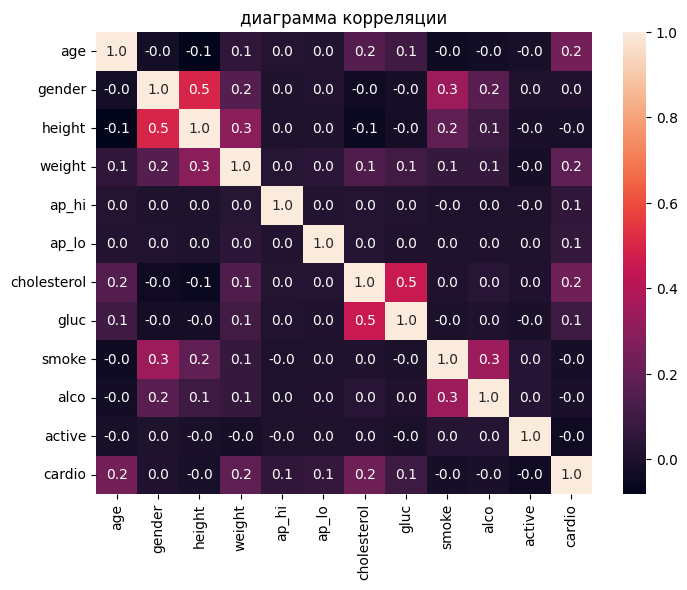

In [21]:
plt.figure(figsize=(8, 6), dpi=100)
plt.title("диаграмма корреляции")
sns.heatmap(cardio_train.select_dtypes(include=['number']).corr(), annot=True, fmt = '0.1f');